In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv("2009_2020CrimeData.csv")

In [32]:
df=pd.DataFrame(data)

In [33]:
# To see all the col
pd.set_option('display.max_columns',None)
df.head(5)

,IDCol,Report Number,Report Date,Day Occurred,Day Number,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Zone,Location,Apartment Number,Crime Type,NIBRS Code,Neighborhood,NPU,Longitude,Latitude,ObjectId,x,y
0,320197,203581105,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,10:00,12/23/2020,16:45,410,4,2400 CAMPBELLTON RD SW,NaN,BURGLARY,220,Campbellton Road,R,-84.466012,33.702732,1,-9.402713e+06,3.988956e+06
1,320198,203581144,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,17:16,12/23/2020,17:30,505,5,736 W PEACHTREE ST NW,NaN,LARCENY-FROM VEHICLE,23F,Midtown,E,-84.387771,33.774764,2,-9.394004e+06,3.998598e+06
2,320199,203581174,12/23/2020 12:00:00 AM,Saturday,7,12/19/2020,21:50,12/19/2020,22:30,211,2,2399 PIEDMONT RD NE,NaN,LARCENY-FROM VEHICLE,23F,Lindbergh/Morosgo,B,-84.366938,33.819892,3,-9.391685e+06,4.004643e+06
3,320200,203581238,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,18:05,12/23/2020,18:09,206,2,339 BUCKHEAD AVE NE,NaN,AUTO THEFT,240,Buckhead Village,B,-84.376506,33.837935,4,-9.392750e+06,4.007061e+06
4,320201,203581247,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,18:12,NaN,NaN,204,2,1801 HOWELL MILL RD NW,NaN,LARCENY-NON VEHICLE,23C,Berkeley Park,D,-84.412846,33.804230,5,-9.396795e+06,4.002545e+06


In [34]:
# To check the Datatypes for each Col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366824 entries, 0 to 366823
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IDCol             366824 non-null  int64  
 1   Report Number     366824 non-null  int64  
 2   Report Date       366824 non-null  object 
 3   Day Occurred      366818 non-null  object 
 4   Day Number        366824 non-null  int64  
 5   Occur Date        366818 non-null  object 
 6   Occur Time        366818 non-null  object 
 7   Possible Date     366665 non-null  object 
 8   Possible Time     366665 non-null  object 
 9   Beat              366824 non-null  int64  
 10  Zone              366824 non-null  int64  
 11  Location          366822 non-null  object 
 12  Apartment Number  68193 non-null   object 
 13  Crime Type        366824 non-null  object 
 14  NIBRS Code        351915 non-null  object 
 15  Neighborhood      351058 non-null  object 
 16  NPU               36

In [35]:
#Apartment number has 81% data missing, as for rest it's below 5%
count_non_null = df.count()
total_rows = len(df)
percent_missing = 100 * (1 - count_non_null / total_rows)
summary_df = pd.DataFrame({
    'Count_Non_Null': count_non_null,
    'Percent_Missing': percent_missing
})
summary_df

,Count_Non_Null,Percent_Missing
IDCol,366824,0.000000
Report Number,366824,0.000000
Report Date,366824,0.000000
Day Occurred,366818,0.001636
Day Number,366824,0.000000
Occur Date,366818,0.001636
Occur Time,366818,0.001636
Possible Date,366665,0.043345
Possible Time,366665,0.043345
Beat,366824,0.000000


In [36]:
#Deleting Apartment Number as it's missing mostly
del df['Apartment Number']

In [37]:
df.head(5)

,IDCol,Report Number,Report Date,Day Occurred,Day Number,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Zone,Location,Crime Type,NIBRS Code,Neighborhood,NPU,Longitude,Latitude,ObjectId,x,y
0,320197,203581105,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,10:00,12/23/2020,16:45,410,4,2400 CAMPBELLTON RD SW,BURGLARY,220,Campbellton Road,R,-84.466012,33.702732,1,-9.402713e+06,3.988956e+06
1,320198,203581144,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,17:16,12/23/2020,17:30,505,5,736 W PEACHTREE ST NW,LARCENY-FROM VEHICLE,23F,Midtown,E,-84.387771,33.774764,2,-9.394004e+06,3.998598e+06
2,320199,203581174,12/23/2020 12:00:00 AM,Saturday,7,12/19/2020,21:50,12/19/2020,22:30,211,2,2399 PIEDMONT RD NE,LARCENY-FROM VEHICLE,23F,Lindbergh/Morosgo,B,-84.366938,33.819892,3,-9.391685e+06,4.004643e+06
3,320200,203581238,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,18:05,12/23/2020,18:09,206,2,339 BUCKHEAD AVE NE,AUTO THEFT,240,Buckhead Village,B,-84.376506,33.837935,4,-9.392750e+06,4.007061e+06
4,320201,203581247,12/23/2020 12:00:00 AM,Wednesday,4,12/23/2020,18:12,NaN,NaN,204,2,1801 HOWELL MILL RD NW,LARCENY-NON VEHICLE,23C,Berkeley Park,D,-84.412846,33.804230,5,-9.396795e+06,4.002545e+06


In [38]:
#checking if IDCol and Reportnumber are unique
n1=len(pd.unique(df['IDCol']))
n2=len(pd.unique(df['Report Number']))
print(n1,n2)

366824 366817


In [39]:
#seeing Reportnumbers with multiple IDcol
new = df.groupby(['Report Number'])['IDCol'].count().sort_values(ascending=False)
new.head(10)

Report Number
203081476    2
202900817    2
202720096    2
203530800    2
202241575    2
202491964    2
203020020    2
203661911    1
121411866    1
121411966    1
Name: IDCol, dtype: int64

In [40]:
#checking why duplicates, tagged in 2 neighbourhoods but same complaints. since the count is very low we ingnore it
multiples=[203081476,202900817,202720096,203530800,202241575,202491964,203020020]
df['is_in_list'] = df['Report Number'].isin(multiples)
df[df['is_in_list']==1]

,IDCol,Report Number,Report Date,Day Occurred,Day Number,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Zone,Location,Crime Type,NIBRS Code,Neighborhood,NPU,Longitude,Latitude,ObjectId,x,y,is_in_list
1285,317952,203530800,12/18/2020 12:00:00 AM,Friday,6,12/18/2020,12:35,12/18/2020,12:40,608,6,737 S PONCE DE LEON AVE NE,LARCENY-NON VEHICLE,23C,Poncey-Highland,N,-84.348956,33.773647,1286,-9.389683e+06,3.998449e+06,True
1286,317953,203530800,12/18/2020 12:00:00 AM,Friday,6,12/18/2020,12:35,12/18/2020,12:40,608,6,737 S PONCE DE LEON AVE NE,LARCENY-NON VEHICLE,23C,Druid Hills,N,-84.348956,33.773647,1287,-9.389683e+06,3.998449e+06,True
4224,303816,203081476,11/3/2020 12:00:00 AM,Tuesday,3,11/3/2020,17:42,11/3/2020,17:43,608,6,777 S PONCE DE LEON AVE NE,LARCENY-FROM VEHICLE,23F,Poncey-Highland,N,-84.348956,33.773647,4225,-9.389683e+06,3.998449e+06,True
4225,303817,203081476,11/3/2020 12:00:00 AM,Tuesday,3,11/3/2020,17:42,11/3/2020,17:43,608,6,777 S PONCE DE LEON AVE NE,LARCENY-FROM VEHICLE,23F,Druid Hills,N,-84.348956,33.773647,4226,-9.389683e+06,3.998449e+06,True
5200,303262,203020020,10/28/2020 12:00:00 AM,Tuesday,3,10/27/2020,20:00,10/28/2020,0:10,608,6,777 S PONCE DE LEON AVE NE,LARCENY-FROM VEHICLE,23F,Poncey-Highland,N,-84.348956,33.773647,5201,-9.389683e+06,3.998449e+06,True
5201,303263,203020020,10/28/2020 12:00:00 AM,Tuesday,3,10/27/2020,20:00,10/28/2020,0:10,608,6,777 S PONCE DE LEON AVE NE,LARCENY-FROM VEHICLE,23F,Druid Hills,N,-84.348956,33.773647,5202,-9.389683e+06,3.998449e+06,True
6503,293344,202491964,10/14/2020 12:00:00 AM,Saturday,7,9/26/2020,17:59,NaN,NaN,307,3,1483 ARTHUR LANGFORD JR PL SW,AGG ASSAULT,13A,Joyland,Y,-84.398421,33.713873,6504,-9.395189e+06,3.990447e+06,True
6650,299736,202900817,10/16/2020 12:00:00 AM,Friday,6,10/16/2020,11:50,10/16/2020,11:53,608,6,737 S PONCE DE LEON AVE NE,LARCENY-NON VEHICLE,23C,Poncey-Highland,N,-84.348956,33.773647,6651,-9.389683e+06,3.998449e+06,True
6651,299737,202900817,10/16/2020 12:00:00 AM,Friday,6,10/16/2020,11:50,10/16/2020,11:53,608,6,737 S PONCE DE LEON AVE NE,LARCENY-NON VEHICLE,23C,Druid Hills,N,-84.348956,33.773647,6652,-9.389683e+06,3.998449e+06,True
7861,293351,202720096,10/1/2020 12:00:00 AM,Thursday,5,10/1/2020,17:45,10/1/2020,20:18,110,1,2265 PERRY BLVD NW,AUTO THEFT,240,Scotts Crossing,G,-84.464805,33.805921,7862,-9.402579e+06,4.002772e+06,True


Checking data mix/trends for Time metrics like date , day of week etc to see if there's any skew there , variables checked are these \

2   Report Date       366824 non-null  object \
3   Day Occurred      366818 non-null  object \
4   Day Number        366824 non-null  int64  \
5   Occur Date        366818 non-null  object \
6   Occur Time        366818 non-null  object \
7   Possible Date     366665 non-null  object \
8   Possible Time     366665 non-null  object 


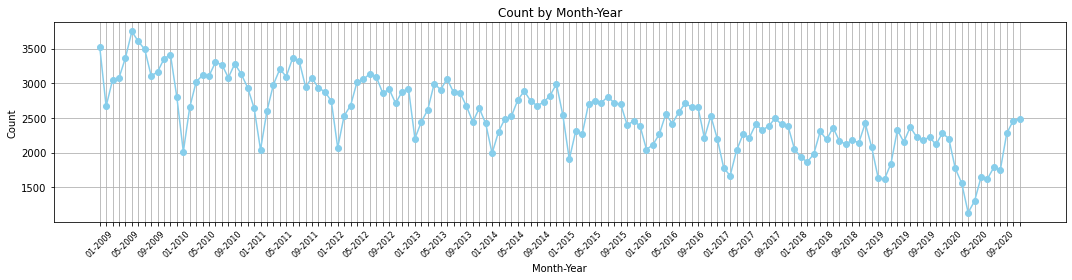

In [41]:
# seeing 
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['mm_yyyy'] = df['Report Date'].dt.strftime('%m-%Y')
monthly_counts = df.groupby('mm_yyyy').size().reset_index(name='counts')
monthly_counts['mm_yyyy'] = pd.to_datetime(monthly_counts['mm_yyyy'], format='%m-%Y')
monthly_counts = monthly_counts.sort_values('mm_yyyy')
monthly_counts['mm_yyyy'] = monthly_counts['mm_yyyy'].dt.strftime('%m-%Y')
plt.figure(figsize=(15, 4)) # Adjusted for a smaller size
plt.plot(monthly_counts['mm_yyyy'], monthly_counts['counts'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Count by Month-Year')
tick_spacing = 4
tick_labels = [label if i % tick_spacing == 0 else '' for i, label in enumerate(monthly_counts['mm_yyyy'])]
plt.xticks(ticks=range(len(monthly_counts['mm_yyyy'])), labels=tick_labels, rotation=45, fontsize=8)

plt.tight_layout()
plt.grid(True)
plt.show()

<b>We can see a decreasing trend in the count of crimes by month over the years with the seasonality factor looking kind of repetitive across years

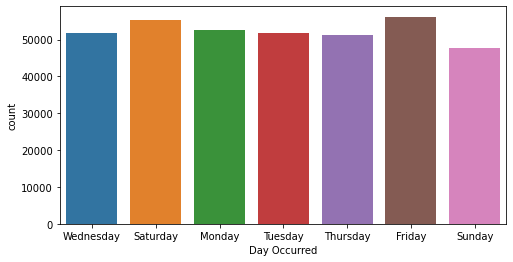

In [42]:
# Day Occurred & Day Number suggest same variable, day of week
plt.figure(figsize=(8, 4))
sns.countplot(x='Day Occurred', data=df)
plt.show()

<b>Distribution looks even for different week days

In [43]:
pip install calplot

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


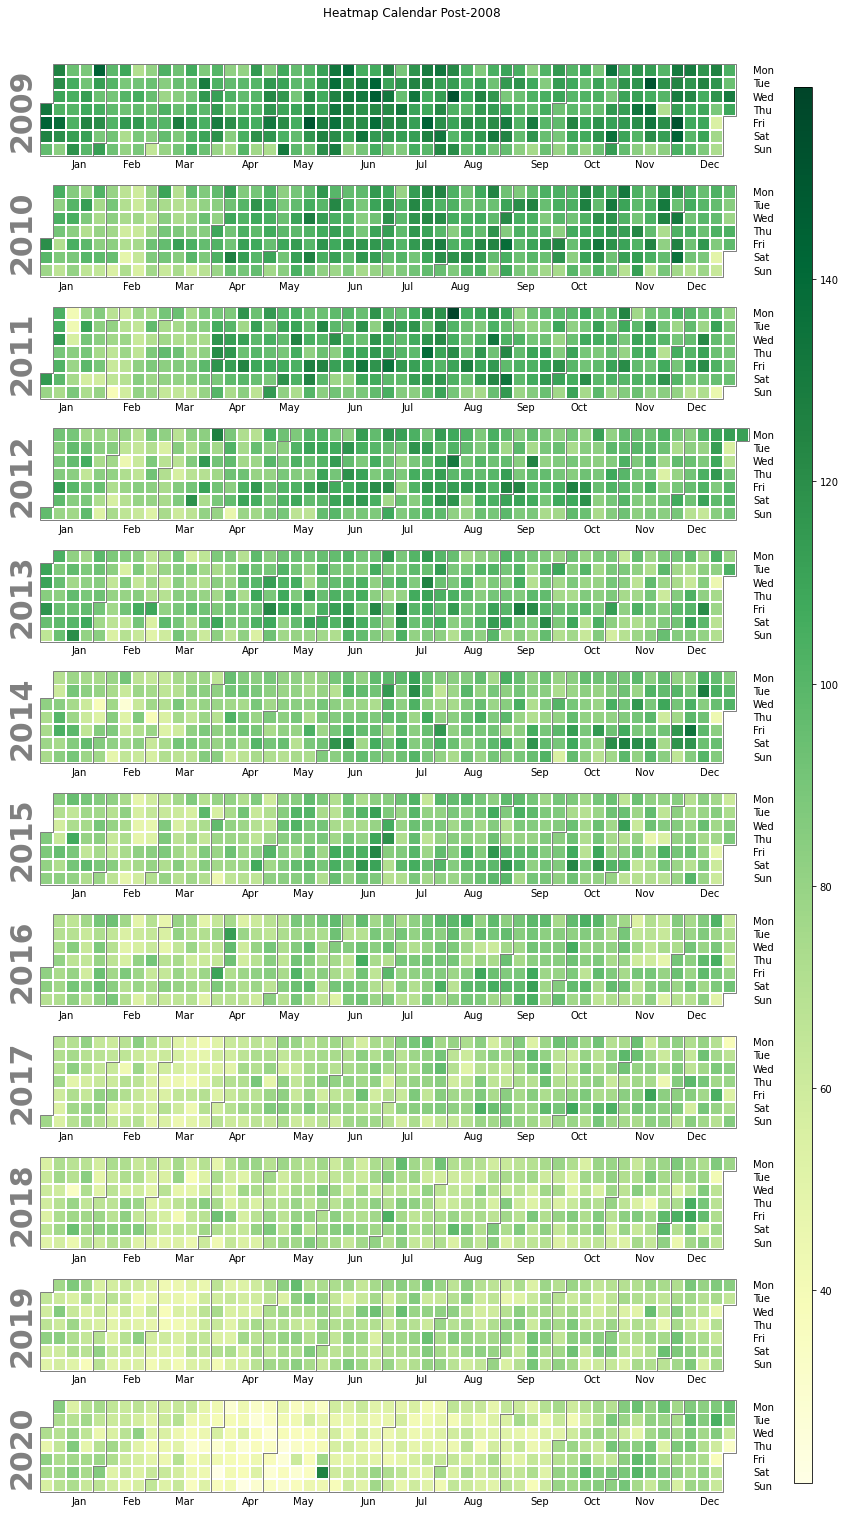

In [44]:
# have ignored crimes which have ocured before 2009 and reported since 2009
import calplot
df['Occur Date'] = pd.to_datetime(df['Occur Date'], errors='coerce')

df2 = df.dropna(subset=['Occur Date'])

df_post_2008 = df2[df2['Occur Date'].dt.year > 2008]

# Set the 'Occur Date' as the index
df_post_2008 = df_post_2008.set_index('Occur Date')

# Count the occurrences by day
daily_values_post_2008 = df_post_2008['IDCol'].resample('D').count()

# Plot the heatmap calendar for data post-2008
calplot.calplot(daily_values_post_2008, cmap='YlGn', suptitle='Heatmap Calendar Post-2008')

# Show the plot
plt.show()

<b> Day wise calender heat map plot shows the decreasing trend of overall reported crime count across days of years

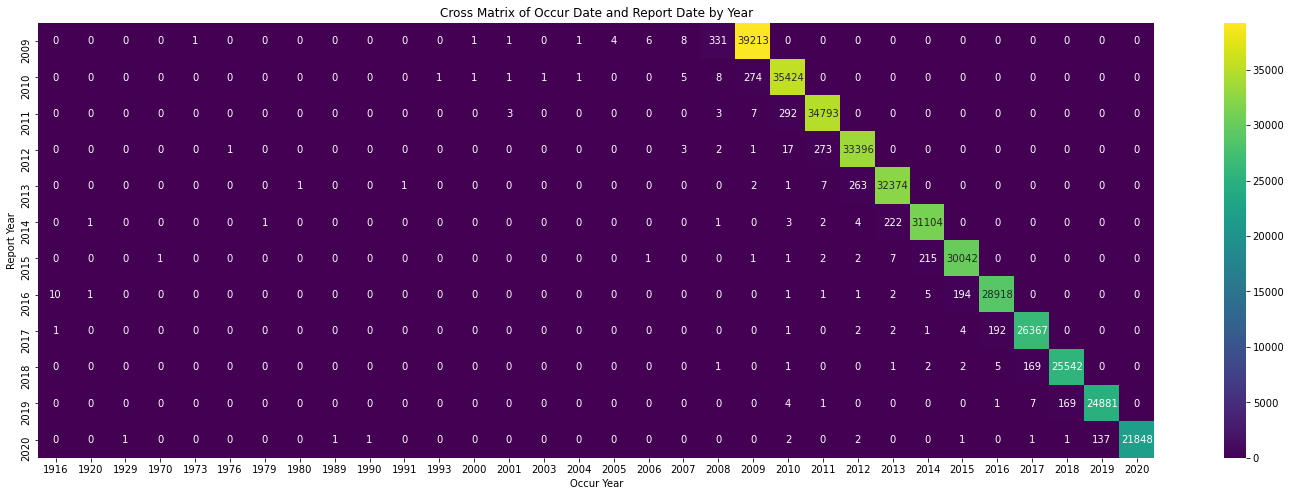

In [45]:
df['Occur Date'] = pd.to_datetime(df['Occur Date'])
df['Report Date'] = pd.to_datetime(df['Report Date'])

# Drop rows with NaT if they exist after conversion
df = df.dropna(subset=['Occur Date', 'Report Date'])

# Extract the year from 'Occur Date' and 'Report Date'
df['Occur Year'] = df['Occur Date'].dt.year
df['Report Year'] = df['Report Date'].dt.year

# Create a pivot table with 'Occur Year' as columns, 'Report Year' as rows, 
# and count the occurrences for each combination
cross_matrix = df.pivot_table(index='Report Year', columns='Occur Year', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(cross_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Cross Matrix of Occur Date and Report Date by Year')
plt.ylabel('Report Year')
plt.xlabel('Occur Year')
plt.show()

<b> Matrix plot of Reported Year vs Occur Year Count. As Expected, most reported events are from crimes which happened in same year

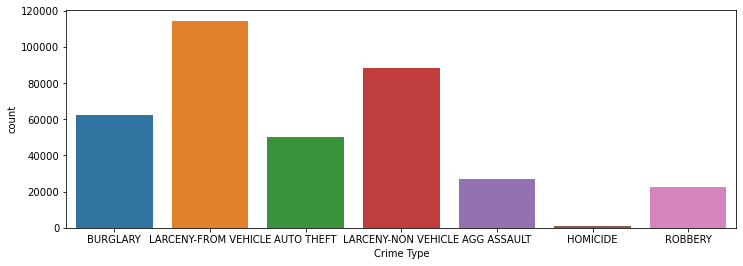

In [46]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Crime Type', data=df)
plt.show()

<b> overall distribution by Crime Type

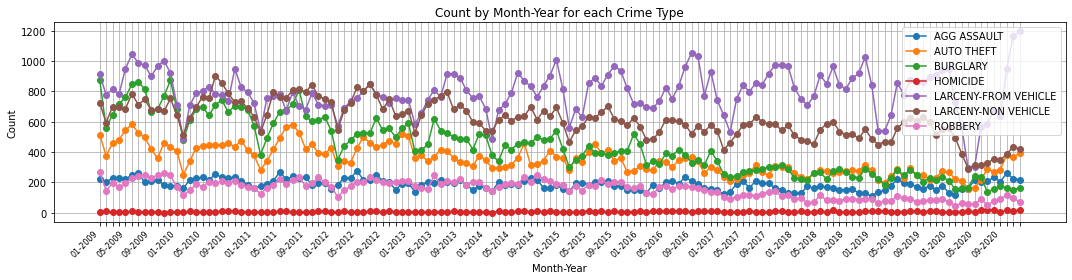

In [47]:
monthly_crime_counts = df.groupby(['mm_yyyy', 'Crime Type']).size().reset_index(name='counts')
monthly_crime_counts['mm_yyyy'] = pd.to_datetime(monthly_crime_counts['mm_yyyy'], format='%m-%Y')

# Sort the DataFrame by 'mm_yyyy'
monthly_crime_counts = monthly_crime_counts.sort_values('mm_yyyy')

# Convert 'mm_yyyy' back to string for plotting
monthly_crime_counts['mm_yyyy'] = monthly_crime_counts['mm_yyyy'].dt.strftime('%m-%Y')

# Plot setup
plt.figure(figsize=(15, 4))

# Get unique crime types
crime_types = monthly_crime_counts['Crime Type'].unique()

# Loop through each crime type and plot the line
for crime in crime_types:
    # Filter the DataFrame by crime type
    crime_df = monthly_crime_counts[monthly_crime_counts['Crime Type'] == crime]
    
    # Plot
    plt.plot(crime_df['mm_yyyy'], crime_df['counts'], marker='o', linestyle='-', label=crime)

# Labeling
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Count by Month-Year for each Crime Type')

# Only show every 4th label to prevent clutter
tick_spacing = 4
tick_labels = [label if i % tick_spacing == 0 else '' for i, label in enumerate(monthly_crime_counts['mm_yyyy'].unique())]

plt.xticks(ticks=range(len(monthly_crime_counts['mm_yyyy'].unique())), labels=tick_labels, rotation=45, ha="right", fontsize=8)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

<b> we can see decreasing trend for some Crimes like Larceny-Non Vehicle

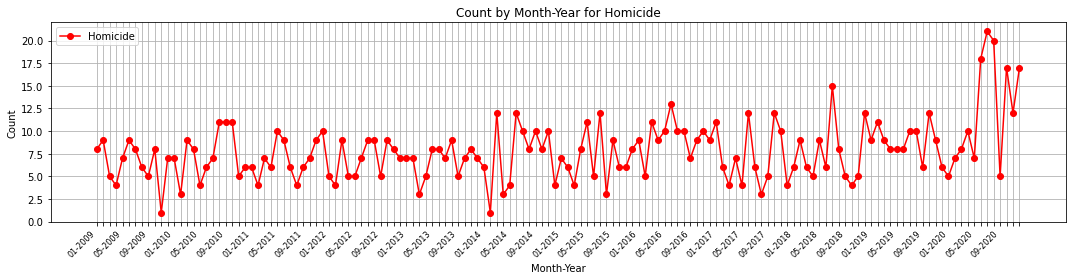

In [48]:
homicide_df = df[df['Crime Type'] == 'HOMICIDE']

# Create a new DataFrame to store counts by month-year for Homicide
homicide_counts = homicide_df.groupby('mm_yyyy').size().reset_index(name='counts')
homicide_counts['mm_yyyy'] = pd.to_datetime(homicide_counts['mm_yyyy'], format='%m-%Y')

# Sort the DataFrame by 'mm_yyyy'
homicide_counts = homicide_counts.sort_values('mm_yyyy')

# Convert 'mm_yyyy' back to string for plotting
homicide_counts['mm_yyyy'] = homicide_counts['mm_yyyy'].dt.strftime('%m-%Y')

# Plot setup
plt.figure(figsize=(15, 4))

# Plot the line for Homicide
plt.plot(homicide_counts['mm_yyyy'], homicide_counts['counts'], marker='o', linestyle='-', color='red', label='Homicide')

# Labeling
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Count by Month-Year for Homicide')

# Only show every 4th label to prevent clutter
tick_spacing = 4
tick_labels = [label if i % tick_spacing == 0 else '' for i, label in enumerate(homicide_counts['mm_yyyy'])]

plt.xticks(ticks=range(len(homicide_counts['mm_yyyy'])), labels=tick_labels, rotation=45, ha="right", fontsize=8)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

<b> Reported Homicide count trend is on the rise across years. Plotted seperately as scale was smaller than others

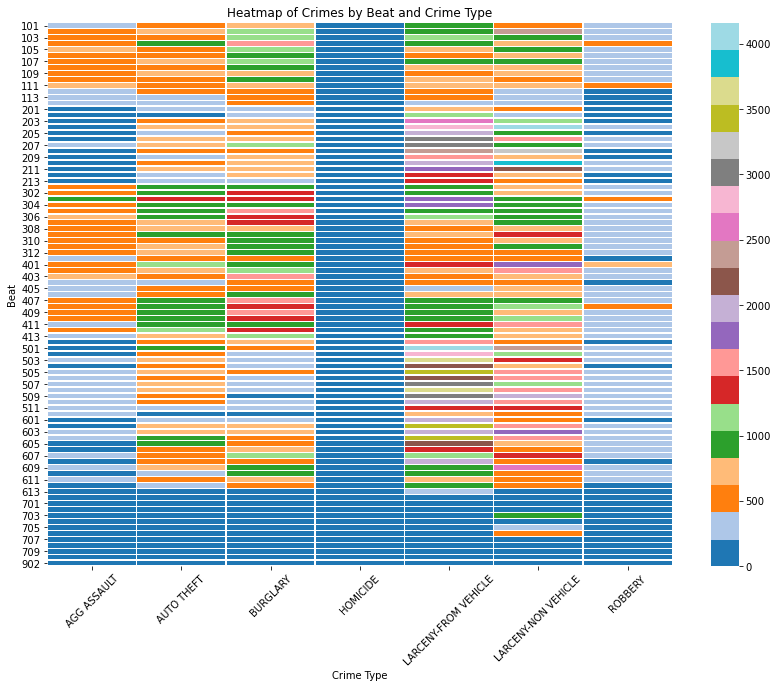

In [49]:
# Pivot the data to create a 'Beat' x 'Crime Type' matrix and count the occurrences
heatmap_data = df.pivot_table(values='IDCol', index='Beat', columns='Crime Type', aggfunc='count', fill_value=0)

# Now, create the heatmap
plt.figure(figsize=(14, 10))  # Adjust your figure size as needed
sns.heatmap(heatmap_data, cmap='tab20', linewidths=.5)

# Labels and title
plt.title('Heatmap of Crimes by Beat and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Beat')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<b> This heat map plot gives a good idea of which beats should be focussed to prevent a certaintype of crime. For example, 
if Agg ASSAULT is to be decreased then beat  102-110 and 302-310 can have more patrols

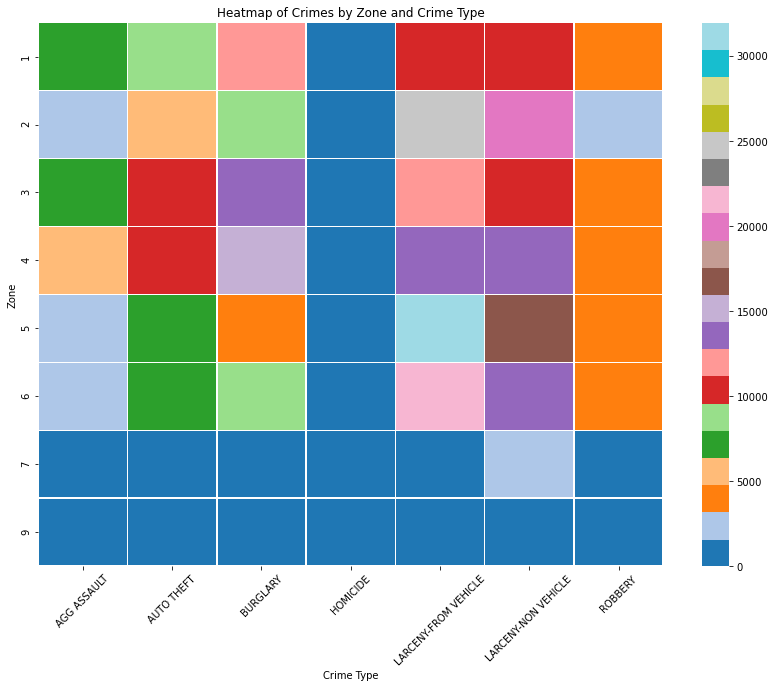

In [50]:
# Pivot the data to create a 'Beat' x 'Crime Type' matrix and count the occurrences
heatmap_data = df.pivot_table(values='IDCol', index='Zone', columns='Crime Type', aggfunc='count', fill_value=0)

# Now, create the heatmap
plt.figure(figsize=(14, 10))  # Adjust your figure size as needed
sns.heatmap(heatmap_data, cmap='tab20', linewidths=.5)

# Labels and title
plt.title('Heatmap of Crimes by Zone and Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Zone')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

<b> Similar to how beats Zones can be targetted, to decrease Larceny Zone 1 can be patrolled more

In [ ]:
# pip install folium

In [52]:
import folium
from folium.plugins import FastMarkerCluster

# Create the map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Add points to the map using FastMarkerCluster
m.add_child(FastMarkerCluster(df[['Latitude', 'Longitude']].values.tolist(), 
                              popup=[f"Crime: {crime}" for crime in df['Crime Type']]))

# Show the map
m.save('map.html')